### Well56

Spencer Harris  
Data Analysis  
Fogland Point, Tiverton, Rhode Island, US

**The data is pressure/temperature/conductivity data collected in a domestic well at 30 minute intervals. There is also another data set that is composed of barometric pressure for compensation. The exact source of that data is from In-Situ AquaTroll 200s that I installed on Fogland Point, RI. The format of the data is CSV. Also the is Percipitation data being loaded in from a Wunderground Personal Weater Station nearby to compare against the water level data**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%pwd
#os.listdir()

'/home/zonas/Documents/Projects/foglandpoint/PSet_7'

In [3]:
# name/number of the well that we are looking at in this notebook
subject_well = '56'

In [4]:
# pulling in the hard measurements (water levels retrieved with water level sounder) and well TOC elevations
man_measures = pd.read_csv('../data/All_WLs.csv', delimiter=',')
# pulling in the transducer data
barofile = '../data/troll/2017-08-17_16-05-25_fogland-point_Log_baro081717.csv'
well56file = '../data/troll/2017-08-17_16-34-14_fogland-point_Log_56pointview081717.csv'
baro = pd.read_csv(barofile, skiprows=25)
well56 = pd.read_csv(well56file, skiprows=25)

In [5]:
#check for size of data
print (baro.shape, well56.shape)

(4122, 3) (4120, 6)


In [6]:
well56[:10]

,Date Time,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396)
0,2017-08-17 16:34:14.116,14.72115,24.40741,0.0000,0.0000,0.000000
1,2017-08-17 17:04:14.116,44.39252,12.11579,370.9738,492.0654,0.237952
2,2017-08-17 17:34:14.116,44.40427,12.10703,374.7246,497.1508,0.240478
3,2017-08-17 18:04:14.116,44.40371,12.10540,377.0114,500.2054,0.241998
4,2017-08-17 18:34:14.116,44.39547,12.10496,377.7091,501.1367,0.242461
5,2017-08-17 19:04:14.116,44.39802,12.10459,377.4746,500.8303,0.242309
6,2017-08-17 19:34:14.116,44.50608,12.10487,377.0327,500.2404,0.242015
7,2017-08-17 20:04:14.116,44.61566,12.10478,376.5337,499.5795,0.241686
8,2017-08-17 20:34:14.116,44.77082,12.10432,376.2101,499.1560,0.241475
9,2017-08-17 21:04:14.116,44.91403,12.10414,376.0754,498.9795,0.241387


Since the two data frames are of different sizes we need to inspect them and try to line/match them up temporally the best we can. This shouldn't be too hard because both of the files have one measurement every 30 minutes. If the two files' temporal resolution was different then it would be more difficult

In [7]:
baro[:10]

,Date Time,Pressure (psi) (525373),Temperature (°C) (525373)
0,2017-08-17 16:05:25.278,14.71757,20.58728
1,2017-08-17 16:35:25.278,14.71992,19.49414
2,2017-08-17 17:05:25.278,14.72049,18.43887
3,2017-08-17 17:35:25.278,14.71942,18.11523
4,2017-08-17 18:05:25.278,14.71662,18.02957
5,2017-08-17 18:35:25.278,14.72028,18.01942
6,2017-08-17 19:05:25.278,14.71957,17.98892
7,2017-08-17 19:35:25.278,14.72536,18.00272
8,2017-08-17 20:05:25.278,14.73132,18.00127
9,2017-08-17 20:35:25.278,14.72902,17.99982


In [8]:
well56[:10]

,Date Time,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396)
0,2017-08-17 16:34:14.116,14.72115,24.40741,0.0000,0.0000,0.000000
1,2017-08-17 17:04:14.116,44.39252,12.11579,370.9738,492.0654,0.237952
2,2017-08-17 17:34:14.116,44.40427,12.10703,374.7246,497.1508,0.240478
3,2017-08-17 18:04:14.116,44.40371,12.10540,377.0114,500.2054,0.241998
4,2017-08-17 18:34:14.116,44.39547,12.10496,377.7091,501.1367,0.242461
5,2017-08-17 19:04:14.116,44.39802,12.10459,377.4746,500.8303,0.242309
6,2017-08-17 19:34:14.116,44.50608,12.10487,377.0327,500.2404,0.242015
7,2017-08-17 20:04:14.116,44.61566,12.10478,376.5337,499.5795,0.241686
8,2017-08-17 20:34:14.116,44.77082,12.10432,376.2101,499.1560,0.241475
9,2017-08-17 21:04:14.116,44.91403,12.10414,376.0754,498.9795,0.241387


So if we inspect the data we note that the 0th row/measurement of `well56` actually matches up with the 1st row/measurement of `baro`  
If we shift `well56` by 1 row the two should match up quite nicely

In [9]:
#matching up our readings/indicies
well56 = well56.shift(1)

In [10]:
well56.columns

Index(['Date Time', 'Pressure (psi) (534396)', 'Temperature (°C) (534396)',
       'Actual Conductivity (µS/cm) (534396)',
       'Specific Conductivity (µS/cm) (534396)', 'Salinity (PSU) (534396)'],
      dtype='object')

**"manual" barometric compensation** derived from [In-Situ Inc.](https://in-situ.com/wp-content/uploads/2014/11/Manual-Level-Mode-Correction-for-Non-Vented-Sensors.pdf)  

Basic idea: Depth is the amount of water over the pressure sensor plus barometric pressure.  

Water level can be calculated in meters using the following equation: D = (0.703073 X (Pm-Bm)) / SG

In [11]:
well56['compd_(psi)']  = well56['Pressure (psi) (534396)'].sub(baro['Pressure (psi) (525373)'].squeeze())
well56['baro_reading'] = baro['Pressure (psi) (525373)']
Lr = man_measures
# Lr = reference level
well56['Transducer_level_ft'] = (well56['compd_(psi)'] * 2.30666) 
well56['water_level_ft_LMSL'] = (Lr.iloc[0][' TOC Elevation (LSML)']) - (well56['compd_(psi)'] * 2.30666)

Below the date/time is being converted into a format that Pandas can read and then it is being assigned as the index for the data frames

In [12]:
well56['Datetime'] = pd.to_datetime(well56['Date Time'], errors='coerce')
well56 = well56.set_index('Datetime')
well56 = well56.drop('Date Time', 1)

baro['Datetime'] = pd.to_datetime(baro['Date Time'], errors='coerce')
baro = baro.set_index('Datetime')
baro= baro.drop('Date Time', 1)

In [13]:
well56[:10]

,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL
Datetime,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,14.71757,NaN,NaN
2017-08-17 16:34:14.116,14.72115,24.40741,0.0000,0.0000,0.000000,0.00123,14.71992,0.002837,21.529063
2017-08-17 17:04:14.116,44.39252,12.11579,370.9738,492.0654,0.237952,29.67203,14.72049,68.443285,-46.911385
2017-08-17 17:34:14.116,44.40427,12.10703,374.7246,497.1508,0.240478,29.68485,14.71942,68.472856,-46.940956
2017-08-17 18:04:14.116,44.40371,12.10540,377.0114,500.2054,0.241998,29.68709,14.71662,68.478023,-46.946123
2017-08-17 18:34:14.116,44.39547,12.10496,377.7091,501.1367,0.242461,29.67519,14.72028,68.450574,-46.918674
2017-08-17 19:04:14.116,44.39802,12.10459,377.4746,500.8303,0.242309,29.67845,14.71957,68.458093,-46.926193
2017-08-17 19:34:14.116,44.50608,12.10487,377.0327,500.2404,0.242015,29.78072,14.72536,68.693996,-47.162096
2017-08-17 20:04:14.116,44.61566,12.10478,376.5337,499.5795,0.241686,29.88434,14.73132,68.933012,-47.401112


In [14]:
man_measures['Datetime'] = pd.to_datetime(man_measures['Date Time'])
man_measures = man_measures.set_index('Datetime')
man_measures= man_measures.drop(('Date Time'), 1)
man_measures= man_measures.drop(('date'), 1)
man_measures= man_measures.drop(('time'), 1)
# combine the above three lines into 1 using a list
man_measures.columns


Index(['well', 'lat ', 'lon', 'feet below TOC', ' TOC Elevation (LSML)',
       'Water level above LMSL', 'tide'],
      dtype='object')

Below we have selected out the manual reading that pertain to the `subject_well` we are currently looking at  

The next level of efficency here would be to have the script automatically select where the transducer data matches with (is within 29 minutes) of a manual level.  

But we are just going to look above and pick which row corresponds with the first few transducer readings.

In [15]:
well56_measures = man_measures.loc[man_measures['well'].str.contains(subject_well)==True, : ]
well56_measures

,well,lat,lon,feet below TOC,TOC Elevation (LSML),Water level above LMSL,tide
Datetime,,,,,,,
2017-06-17 14:32:00,56,41.561257,-71.220166,15.69,21.5319,5.8419,high
2017-08-16 15:07:00,56,41.561257,-71.220166,20.01,21.5319,1.5219,high
2017-08-17 17:39:00,56,41.561257,-71.220166,20.08,21.5319,1.4519,NaN
2017-08-18 08:26:00,56,41.561257,-71.220166,19.80,21.5319,1.7319,NaN
2017-11-11 10:30:00,56,41.561257,-71.220166,16.73,21.5319,4.8019,NaN


#### specific to this well
In this case (subject_well = '56') we are picking row 2 which has a Datetime index of `2017-08-17 17:39:00` which matches up nicely with the transducer's 3rd reading, seen on row 2 of the `well56` dataframe, which has a Datetime index of `2017-08-17 17:34:14.116`   

We will use the manual measurement to come up with our transducer's setting in the well (`man_measures`'s **feet below TOC** + `well56`'s **Transducer_level_ft**)

In [16]:
transducer_set = well56_measures.iloc[2]['feet below TOC'] + well56.iloc[2]['Transducer_level_ft']
transducer_set

88.523284719800017

In [17]:
well56['calculated_depth'] = transducer_set - well56['Transducer_level_ft'] 
well56['GW_elevation_ft_(LSML)'] = well56_measures.iloc[2][' TOC Elevation (LSML)'] - well56['calculated_depth']
well56[:]

,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL,calculated_depth,GW_elevation_ft_(LSML)
Datetime,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,14.71757,NaN,NaN,NaN,NaN
2017-08-17 16:34:14.116,14.72115,24.407410,0.0000,0.0000,0.000000,0.00123,14.71992,0.002837,21.529063,88.520448,-66.988548
2017-08-17 17:04:14.116,44.39252,12.115790,370.9738,492.0654,0.237952,29.67203,14.72049,68.443285,-46.911385,20.080000,1.451900
2017-08-17 17:34:14.116,44.40427,12.107030,374.7246,497.1508,0.240478,29.68485,14.71942,68.472856,-46.940956,20.050429,1.481471
2017-08-17 18:04:14.116,44.40371,12.105400,377.0114,500.2054,0.241998,29.68709,14.71662,68.478023,-46.946123,20.045262,1.486638
2017-08-17 18:34:14.116,44.39547,12.104960,377.7091,501.1367,0.242461,29.67519,14.72028,68.450574,-46.918674,20.072711,1.459189
2017-08-17 19:04:14.116,44.39802,12.104590,377.4746,500.8303,0.242309,29.67845,14.71957,68.458093,-46.926193,20.065191,1.466709
2017-08-17 19:34:14.116,44.50608,12.104870,377.0327,500.2404,0.242015,29.78072,14.72536,68.693996,-47.162096,19.829289,1.702611
2017-08-17 20:04:14.116,44.61566,12.104780,376.5337,499.5795,0.241686,29.88434,14.73132,68.933012,-47.401112,19.590273,1.941627


In [18]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import numpy as np
% matplotlib inline

(0, 15)

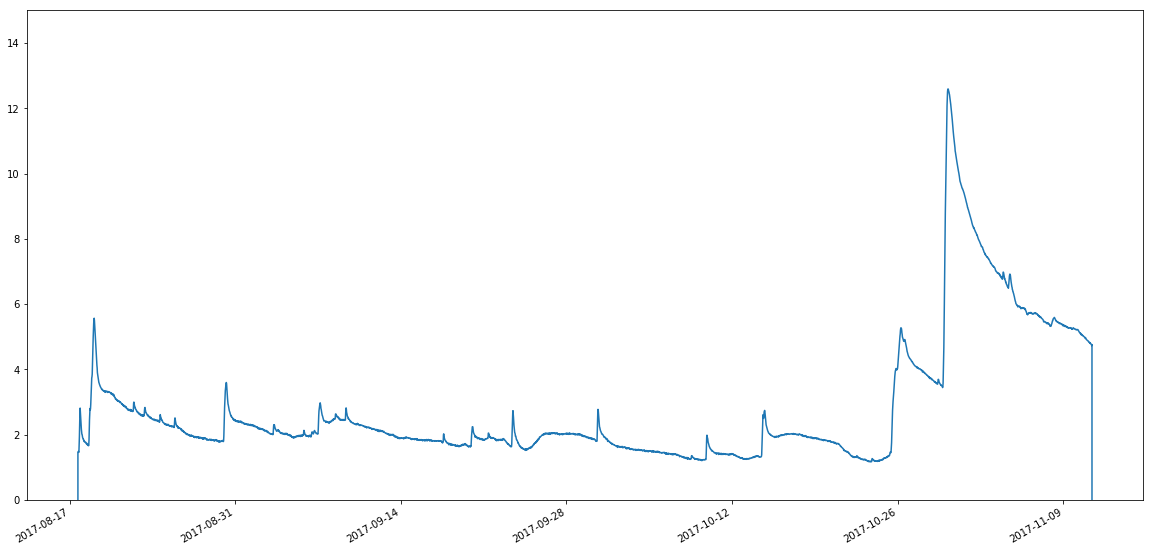

In [19]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(well56['GW_elevation_ft_(LSML)'])
fig.autofmt_xdate()
plt.ylim(0,15)

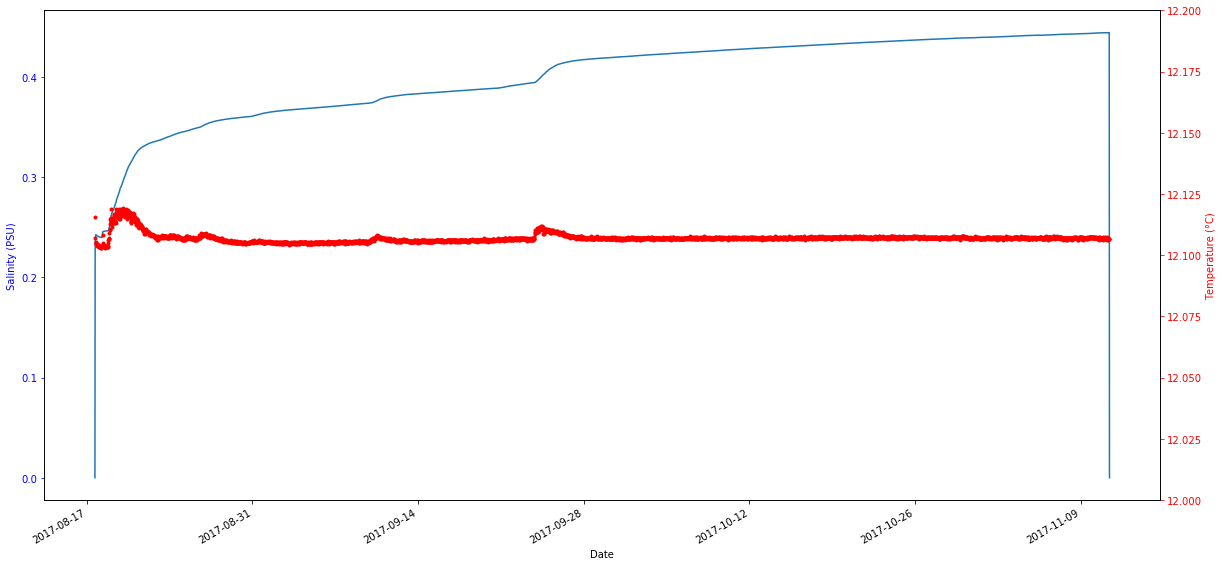

In [20]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(well56['Salinity (PSU) (534396)'])
ax1.set_xlabel('Date')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Salinity (PSU)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = well56['Temperature (°C) (534396)']
ax2.plot(s2, 'r.')
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params('y', colors='r')
plt.ylim(12,12.2)

fig.autofmt_xdate()
fig.autofmt_xdate()
plt.show()

### Fetching Precipitation from Wunderground
modified from https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/  

we are going to use this https://www.wunderground.com/personal-weather-station/dashboard?ID=KRIPORTS37#history/s20171019/e20171118/mmonth weather station

In [21]:
import requests
import pandas as pd
from dateutil import parser, rrule
from datetime import datetime, time, date
import time
import io

In [22]:
def getRainfallData(station, day, month, year):
    """
    Function to return a data frame of minute-level weather data for a single Wunderground PWS station.
    
    Args:
        station (string): Station code from the Wunderground website
        day (int): Day of month for which data is requested
        month (int): Month for which data is requested
        year (int): Year for which data is requested
    
    Returns:
        Pandas Dataframe with weather data for specified station and date.
    """
    url = "http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1"
    full_url = url.format(station=station, day=day, month=month, year=year)
    # Request data from wunderground data
    response = requests.get(full_url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
    data = response.text
    # remove the excess <br> from the text data
    data = data.replace('<br>', '')
    # Convert to pandas dataframe (fails if issues with weather station)
    try:
        dataframe = pd.read_csv(io.StringIO(data), index_col=False)
        dataframe['station'] = station
    except Exception as e:
        print("Issue with date: {}-{}-{} for station {}".format(day,month,year, station))
        return None
    return dataframe

In [23]:
# Generate a list of all of the dates we want data for
start_date = "2017-08-01"
end_date = "2017-11-17"
start = parser.parse(start_date)
end = parser.parse(end_date)
dates = list(rrule.rrule(rrule.DAILY, dtstart=start, until=end))

# Create a list of stations here to download data for
stations = ["KRIPORTS37"]
# Set a backoff time in seconds if a request fails
backoff_time = 10
data = {}

In [24]:
# Gather data for each station in turn and save to CSV.
for station in stations:
    print("Working on {}".format(station))
    data[station] = []
    for date in dates:
        # Print period status update messages
        if date.day % 10 == 0:
            print("Working on date: {} for station {}".format(date, station))
        done = False
        while done == False:
            try:
                weather_data = getRainfallData(station, date.day, date.month, date.year)
                done = True
            except ConnectionError as e:
                # May get rate limited by Wunderground.com, backoff if so.
                print("Got connection error on {}".format(date))
                print("Will retry in {} seconds".format(backoff_time))
                time.sleep(10)
        # Add each processed date to the overall data
        data[station].append(weather_data)
    # Finally combine all of the individual days and output to CSV for analysis.
    pd.concat(data[station]).to_csv("./{}_weather.csv".format(station))

Working on KRIPORTS37
Working on date: 2017-08-10 00:00:00 for station KRIPORTS37
Working on date: 2017-08-20 00:00:00 for station KRIPORTS37
Working on date: 2017-08-30 00:00:00 for station KRIPORTS37
Working on date: 2017-09-10 00:00:00 for station KRIPORTS37
Working on date: 2017-09-20 00:00:00 for station KRIPORTS37
Working on date: 2017-09-30 00:00:00 for station KRIPORTS37
Working on date: 2017-10-10 00:00:00 for station KRIPORTS37
Working on date: 2017-10-20 00:00:00 for station KRIPORTS37
Working on date: 2017-10-30 00:00:00 for station KRIPORTS37
Working on date: 2017-11-10 00:00:00 for station KRIPORTS37


In [25]:
station = 'KRIPORTS37' # Sandy Point Farm, across the channel from Fogland Point
data_raw = pd.read_csv('./{}_weather.csv'.format(station))
data_raw.columns

Index(['Unnamed: 0', 'Time', 'TemperatureF', 'DewpointF', 'PressureIn',
       'WindDirection', 'WindDirectionDegrees', 'WindSpeedMPH',
       'WindSpeedGustMPH', 'Humidity', 'HourlyPrecipIn', 'Conditions',
       'Clouds', 'dailyrainin', 'SolarRadiationWatts/m^2', 'SoftwareType',
       'DateUTC', 'station'],
      dtype='object')

In [26]:
# Give the variables some friendlier names and convert types as necessary.
data_raw['temp'] = data_raw['TemperatureF'].astype(float)
data_raw['rain'] = data_raw['HourlyPrecipIn'].astype(float)
data_raw['date'] = data_raw['DateUTC'].apply(parser.parse)
data_raw['humidity'] = data_raw['Humidity'].astype(float)
data_raw['wind_direction'] = data_raw['WindDirectionDegrees']
data_raw['wind'] = data_raw['WindSpeedMPH']
 
# Extract out only the data we need.
data = data_raw.loc[:, ['date', 'station', 'temp', 'rain', 'humidity', 'wind']]
data = data[(data['date'] >= datetime(2017,8,2)) & (data['date'] <= datetime(2017,11,16))]
 
# There's an issue with some stations that record rainfall ~-2500 where data is missing.
if (data['rain'] < -500).sum() > 10:
    print("There's more than 10 messed up days for {}".format(station))
    
# remove the bad samples
data = data[data['rain'] > -500]
 
# Assign the "day" to every date entry
data['day'] = data['date'].apply(lambda x: x.date())
 
# Get the time, day, and hour of each timestamp in the dataset
data['time_of_day'] = data['date'].apply(lambda x: x.time())
data['day_of_week'] = data['date'].apply(lambda x: x.weekday())    
data['hour_of_day'] = data['time_of_day'].apply(lambda x: x.hour)
# Mark the month for each entry so we can look at monthly patterns
data['month'] = data['date'].apply(lambda x: x.month)

What does this data look like?

In [27]:
! cat KRIPORTS37_weather.csv

,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,HourlyPrecipIn,Conditions,Clouds,dailyrainin,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station
0,2017-08-01 00:00:00,66.2,8.1,30.02,South,185,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:00:00,KRIPORTS37
1,2017-08-01 00:05:00,66.2,8.1,30.01,South,185,1.6,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:05:00,KRIPORTS37
2,2017-08-01 00:10:00,66.2,8.1,30.02,South,185,1.1,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:10:00,KRIPORTS37
3,2017-08-01 00:16:00,66.2,8.1,30.02,South,181,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:16:00,KRIPORTS37
4,2017-08-01 00:21:00,66.2,8.1,30.02,South,182,1.6,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:21:00,KRIPORTS37
5,2017-08-01 00:22:00,66.2,8.1,30.01,South,182,2.2,3.4,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:22:00,KRIPORTS37
6,2017-08-01 00:27:00,66.4,8.2,30.01,South,187,2.2

55,2017-08-09 04:38:00,59.9,59.5,30.09,SSW,204,0.2,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 08:38:00,KRIPORTS37
56,2017-08-09 04:43:00,59.5,59.2,30.09,SSW,204,0.2,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 08:43:00,KRIPORTS37
57,2017-08-09 04:48:00,59.2,58.8,30.09,SSW,204,0.7,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 08:48:00,KRIPORTS37
58,2017-08-09 04:54:00,59.7,59.4,30.1,SSW,204,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 08:54:00,KRIPORTS37
59,2017-08-09 04:59:00,60.6,60.3,30.1,SSW,204,1.1,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 08:59:00,KRIPORTS37
60,2017-08-09 05:04:00,61.5,4.5,30.1,SSW,204,1.8,3.4,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 09:04:00,KRIPORTS37
61,2017-08-09 05:09:00,62.4,5.2,30.1,SSW,204,1.1,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 09:09:00,KRIPORTS37
62,2017-08-09 05:14:00,62.4,5.2,30.11,SSW,203,0.7,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 09:14:00,KRIPORTS37
63,2017-08-09 05:19:00,

228,2017-08-12 19:14:00,67.8,67.5,29.91,SSW,194,0.9,1.1,99,0.0,,,0.46,9.05,WeatherSmart%V1.7.0,2017-08-12 23:14:00,KRIPORTS37
229,2017-08-12 19:19:00,67.8,67.5,29.91,SSW,194,1.3,2.2,99,0.0,,,0.46,6.85,WeatherSmart%V1.7.0,2017-08-12 23:19:00,KRIPORTS37
230,2017-08-12 19:25:00,67.8,67.5,29.91,SSW,194,0.0,0.0,99,0.0,,,0.46,5.99,WeatherSmart%V1.7.0,2017-08-12 23:25:00,KRIPORTS37
231,2017-08-12 19:30:00,67.8,67.5,29.9,SSW,194,0.0,0.0,99,0.0,,,0.46,5.99,WeatherSmart%V1.7.0,2017-08-12 23:30:00,KRIPORTS37
232,2017-08-12 19:35:00,67.8,67.5,29.9,SSW,194,0.0,0.0,99,0.0,,,0.46,5.63,WeatherSmart%V1.7.0,2017-08-12 23:35:00,KRIPORTS37
233,2017-08-12 19:40:00,67.6,67.3,29.91,SSW,194,1.1,1.1,99,0.0,,,0.46,1.22,WeatherSmart%V1.7.0,2017-08-12 23:40:00,KRIPORTS37
234,2017-08-12 19:45:00,67.6,67.3,29.9,SSW,194,0.0,0.0,99,0.0,,,0.46,0.36,WeatherSmart%V1.7.0,2017-08-12 23:45:00,KRIPORTS37
235,2017-08-12 19:50:00,67.6,67.3,29.9,SSW,194,0.2,1.1,99,0.0,,,0.46,0.0,WeatherSmart%V1.7.0,2017-08-12 23:50:00,KRIPORTS

216,2017-08-17 18:25:00,70.3,64.6,30.0,SSE,167,1.1,1.1,82,0.0,,,0.0,72.42,WeatherSmart%V1.7.0,2017-08-17 22:25:00,KRIPORTS37
217,2017-08-17 18:30:00,70.0,64.9,30.0,SSE,167,1.3,2.2,84,0.0,,,0.0,66.31,WeatherSmart%V1.7.0,2017-08-17 22:30:00,KRIPORTS37
218,2017-08-17 18:35:00,69.8,65.5,30.0,SSE,167,1.1,1.1,86,0.0,,,0.0,62.02,WeatherSmart%V1.7.0,2017-08-17 22:35:00,KRIPORTS37
219,2017-08-17 18:40:00,69.6,65.3,30.0,SSE,167,1.1,1.1,86,0.0,,,0.0,55.41,WeatherSmart%V1.7.0,2017-08-17 22:40:00,KRIPORTS37
220,2017-08-17 18:45:00,69.3,65.8,29.99,SSE,167,0.4,1.1,89,0.0,,,0.0,47.71,WeatherSmart%V1.7.0,2017-08-17 22:45:00,KRIPORTS37
221,2017-08-17 18:50:00,68.9,66.6,30.0,SSE,167,0.9,1.1,92,0.0,,,0.0,49.42,WeatherSmart%V1.7.0,2017-08-17 22:50:00,KRIPORTS37
222,2017-08-17 18:55:00,68.7,68.0,29.99,SSE,167,1.3,2.2,97,0.0,,,0.0,39.88,WeatherSmart%V1.7.0,2017-08-17 22:55:00,KRIPORTS37
223,2017-08-17 19:00:00,68.5,68.2,30.0,SSE,167,2.0,2.2,99,0.0,,,0.0,36.82,WeatherSmart%V1.7.0,2017-08-17 23:00:00,KRIPORTS3

100,2017-08-22 08:19:00,71.8,71.4,30.02,SSW,199,3.1,4.5,99,0.0,,,0.0,144.36,WeatherSmart%V1.7.0,2017-08-22 12:19:00,KRIPORTS37
101,2017-08-22 08:24:00,72.1,71.8,30.03,South,191,1.8,3.4,99,0.0,,,0.0,108.39,WeatherSmart%V1.7.0,2017-08-22 12:24:00,KRIPORTS37
102,2017-08-22 08:29:00,72.1,71.8,30.03,South,178,2.7,3.4,99,0.0,,,0.0,135.3,WeatherSmart%V1.7.0,2017-08-22 12:29:00,KRIPORTS37
103,2017-08-22 08:34:00,72.5,72.1,30.02,SSW,203,2.2,3.4,99,0.0,,,0.0,137.02,WeatherSmart%V1.7.0,2017-08-22 12:34:00,KRIPORTS37
104,2017-08-22 08:39:00,72.7,72.3,30.02,SW,233,1.3,2.2,99,0.0,,,0.0,121.36,WeatherSmart%V1.7.0,2017-08-22 12:39:00,KRIPORTS37
105,2017-08-22 08:44:00,72.9,72.5,30.03,SW,222,2.5,3.4,99,0.0,,,0.0,110.96,WeatherSmart%V1.7.0,2017-08-22 12:44:00,KRIPORTS37
106,2017-08-22 08:50:00,73.0,72.7,30.03,SSW,193,4.5,6.9,99,0.0,,,0.0,112.67,WeatherSmart%V1.7.0,2017-08-22 12:50:00,KRIPORTS37
107,2017-08-22 08:55:00,73.0,72.7,30.02,South,182,1.3,2.2,99,0.0,,,0.0,121.36,WeatherSmart%V1.7.0,2017-08-22 1

35,2017-08-26 03:01:00,55.9,55.6,30.18,NNE,15,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:01:00,KRIPORTS37
36,2017-08-26 03:06:00,56.5,56.1,30.18,NNE,15,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:06:00,KRIPORTS37
37,2017-08-26 03:11:00,56.8,56.5,30.18,NNE,15,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:11:00,KRIPORTS37
38,2017-08-26 03:16:00,56.8,56.5,30.18,NNE,15,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:16:00,KRIPORTS37
39,2017-08-26 03:18:00,56.3,0.5,30.18,NNE,15,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:18:00,KRIPORTS37
40,2017-08-26 03:23:00,55.6,0.0,30.18,NNE,15,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:23:00,KRIPORTS37
41,2017-08-26 03:28:00,55.0,-0.6,30.18,NNE,15,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:28:00,KRIPORTS37
42,2017-08-26 03:33:00,54.7,-0.8,30.18,NNE,15,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-26 07:33:00,KRIPORTS37
43,2017-08-26 03:38:00,54.

2,2017-08-29 00:14:00,56.5,0.5,30.28,NE,55,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:14:00,KRIPORTS37
3,2017-08-29 00:19:00,56.3,0.5,30.28,NE,55,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:19:00,KRIPORTS37
4,2017-08-29 00:24:00,56.7,0.7,30.28,NE,55,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:24:00,KRIPORTS37
5,2017-08-29 00:29:00,56.5,0.5,30.28,ENE,74,1.1,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:29:00,KRIPORTS37
6,2017-08-29 00:34:00,56.7,0.7,30.27,NE,55,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:34:00,KRIPORTS37
7,2017-08-29 00:39:00,56.3,0.5,30.27,ENE,74,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:39:00,KRIPORTS37
8,2017-08-29 00:44:00,56.5,0.5,30.28,ENE,74,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:44:00,KRIPORTS37
9,2017-08-29 00:49:00,56.1,0.3,30.27,NE,55,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-29 04:49:00,KRIPORTS37
10,2017-08-29 00:54:00,55.9,0.1,30.27,NE,55,0

217,2017-09-01 18:12:00,64.4,46.4,30.04,SE,125,2.0,3.4,52,0.0,,,0.0,47.71,WeatherSmart%V1.7.0,2017-09-01 22:12:00,KRIPORTS37
218,2017-09-01 18:17:00,63.9,46.9,30.04,SE,125,0.2,1.1,54,0.0,,,0.0,38.53,WeatherSmart%V1.7.0,2017-09-01 22:17:00,KRIPORTS37
219,2017-09-01 18:22:00,63.3,46.9,30.03,ESE,106,2.2,3.4,55,0.0,,,0.0,40.24,WeatherSmart%V1.7.0,2017-09-01 22:22:00,KRIPORTS37
220,2017-09-01 18:27:00,63.1,46.2,30.04,SW,224,1.1,1.1,54,0.0,,,0.0,38.17,WeatherSmart%V1.7.0,2017-09-01 22:27:00,KRIPORTS37
221,2017-09-01 18:33:00,63.0,46.6,30.04,SW,224,1.3,2.2,55,0.0,,,0.0,40.73,WeatherSmart%V1.7.0,2017-09-01 22:33:00,KRIPORTS37
222,2017-09-01 18:38:00,62.8,45.9,30.04,ESE,108,1.6,2.2,54,0.0,,,0.0,29.85,WeatherSmart%V1.7.0,2017-09-01 22:38:00,KRIPORTS37
223,2017-09-01 18:42:00,62.8,46.4,30.04,South,183,2.2,3.4,55,0.0,,,0.0,26.42,WeatherSmart%V1.7.0,2017-09-01 22:42:00,KRIPORTS37
224,2017-09-01 18:44:00,62.6,46.8,30.04,SSW,211,1.3,2.2,56,0.0,,,0.0,25.07,WeatherSmart%V1.7.0,2017-09-01 22:44:00,KRIPO

254,2017-09-04 21:32:00,65.1,64.8,29.88,SSW,203,2.7,3.4,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 01:32:00,KRIPORTS37
255,2017-09-04 21:37:00,65.3,64.9,29.87,SSW,202,2.5,3.4,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 01:37:00,KRIPORTS37
256,2017-09-04 21:42:00,65.1,64.8,29.87,SSW,201,2.7,3.4,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 01:42:00,KRIPORTS37
257,2017-09-04 21:47:00,65.1,64.8,29.87,SSW,207,1.1,2.2,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 01:47:00,KRIPORTS37
258,2017-09-04 21:53:00,65.1,64.8,29.87,South,179,1.3,2.2,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 01:53:00,KRIPORTS37
259,2017-09-04 21:58:00,64.9,64.6,29.87,SSW,205,2.9,3.4,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 01:58:00,KRIPORTS37
260,2017-09-04 22:03:00,65.1,64.8,29.87,SSW,207,1.8,2.2,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 02:03:00,KRIPORTS37
261,2017-09-04 22:08:00,64.9,64.6,29.87,SSW,194,2.7,3.4,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-05 02:08:00,KRIPORTS3

168,2017-09-07 14:18:00,70.5,68.2,29.84,SSW,198,4.3,5.8,92,0.0,,,0.38,549.53,WeatherSmart%V1.7.0,2017-09-07 18:18:00,KRIPORTS37
169,2017-09-07 14:23:00,70.7,68.5,29.84,West,271,2.2,3.4,93,0.0,,,0.38,634.55,WeatherSmart%V1.7.0,2017-09-07 18:23:00,KRIPORTS37
170,2017-09-07 14:28:00,71.6,67.8,29.84,SW,221,3.8,4.5,88,0.0,,,0.38,509.65,WeatherSmart%V1.7.0,2017-09-07 18:28:00,KRIPORTS37
171,2017-09-07 14:33:00,71.6,66.6,29.85,SSW,192,4.9,6.9,84,0.0,,,0.38,693.65,WeatherSmart%V1.7.0,2017-09-07 18:33:00,KRIPORTS37
172,2017-09-07 14:38:00,71.8,67.1,29.83,SSW,203,3.4,4.5,85,0.0,,,0.38,694.5,WeatherSmart%V1.7.0,2017-09-07 18:38:00,KRIPORTS37
173,2017-09-07 14:43:00,72.3,66.6,29.84,SSW,204,4.7,5.8,82,0.0,,,0.38,337.89,WeatherSmart%V1.7.0,2017-09-07 18:43:00,KRIPORTS37
174,2017-09-07 14:48:00,73.0,66.9,29.83,SSW,199,2.7,4.5,81,0.0,,,0.38,671.5,WeatherSmart%V1.7.0,2017-09-07 18:48:00,KRIPORTS37
175,2017-09-07 14:53:00,73.0,66.2,29.84,WSW,237,2.9,4.5,79,0.0,,,0.38,608.13,WeatherSmart%V1.7.0,2017-09-0

223,2017-09-10 18:32:00,64.4,64.0,30.28,ESE,112,0.0,0.0,99,0.0,,,0.0,19.08,WeatherSmart%V1.7.0,2017-09-10 22:32:00,KRIPORTS37
224,2017-09-10 18:37:00,64.0,6.4,30.28,ESE,112,0.0,0.0,10,0.0,,,0.0,13.82,WeatherSmart%V1.7.0,2017-09-10 22:37:00,KRIPORTS37
225,2017-09-10 18:42:00,63.5,5.9,30.28,ESE,112,0.0,0.0,10,0.0,,,0.0,10.39,WeatherSmart%V1.7.0,2017-09-10 22:42:00,KRIPORTS37
226,2017-09-10 18:47:00,63.1,5.7,30.29,ESE,112,0.0,0.0,10,0.0,,,0.0,6.85,WeatherSmart%V1.7.0,2017-09-10 22:47:00,KRIPORTS37
227,2017-09-10 18:52:00,62.8,5.4,30.29,ESE,112,0.0,0.0,10,0.0,,,0.0,2.94,WeatherSmart%V1.7.0,2017-09-10 22:52:00,KRIPORTS37
228,2017-09-10 18:58:00,62.8,5.4,30.28,ESE,112,0.0,0.0,10,0.0,,,0.0,1.71,WeatherSmart%V1.7.0,2017-09-10 22:58:00,KRIPORTS37
229,2017-09-10 19:03:00,63.0,5.5,30.29,ESE,112,0.9,1.1,10,0.0,,,0.0,0.85,WeatherSmart%V1.7.0,2017-09-10 23:03:00,KRIPORTS37
230,2017-09-10 19:08:00,62.6,5.4,30.28,ESE,112,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-10 23:08:00,KRIPORTS37
231,2

238,2017-09-13 20:08:00,69.1,68.7,29.85,SW,235,3.1,4.5,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:08:00,KRIPORTS37
239,2017-09-13 20:13:00,69.1,68.7,29.85,South,179,2.7,3.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:13:00,KRIPORTS37
240,2017-09-13 20:18:00,68.7,68.4,29.86,South,184,2.0,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:18:00,KRIPORTS37
241,2017-09-13 20:23:00,68.4,9.7,29.86,South,186,2.9,4.5,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:23:00,KRIPORTS37
242,2017-09-13 20:29:00,67.8,9.3,29.85,SSW,203,3.1,4.5,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:29:00,KRIPORTS37
243,2017-09-13 20:34:00,67.6,9.1,29.85,SW,226,1.3,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:34:00,KRIPORTS37
244,2017-09-13 20:39:00,67.6,9.1,29.85,SSW,195,2.9,4.5,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:39:00,KRIPORTS37
245,2017-09-13 20:44:00,67.6,9.1,29.85,SSW,193,2.0,4.5,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-14 00:44:00,KRIPORTS37
246,2017-

132,2017-09-16 11:14:00,70.5,70.2,30.16,SE,129,2.5,3.4,99,0.0,,,0.01,314.03,WeatherSmart%V1.7.0,2017-09-16 15:14:00,KRIPORTS37
133,2017-09-16 11:19:00,70.2,69.8,30.17,SE,129,0.0,0.0,99,0.0,,,0.01,327.86,WeatherSmart%V1.7.0,2017-09-16 15:19:00,KRIPORTS37
134,2017-09-16 11:25:00,71.2,70.9,30.17,SE,129,2.2,2.2,99,0.0,,,0.01,437.23,WeatherSmart%V1.7.0,2017-09-16 15:25:00,KRIPORTS37
135,2017-09-16 11:30:00,71.2,70.9,30.16,SE,129,0.2,1.1,99,0.0,,,0.01,325.78,WeatherSmart%V1.7.0,2017-09-16 15:30:00,KRIPORTS37
136,2017-09-16 11:35:00,71.4,71.1,30.16,SE,129,1.3,2.2,99,0.0,,,0.01,320.15,WeatherSmart%V1.7.0,2017-09-16 15:35:00,KRIPORTS37
137,2017-09-16 11:40:00,71.6,71.2,30.17,SE,129,0.7,1.1,99,0.0,,,0.01,345.72,WeatherSmart%V1.7.0,2017-09-16 15:40:00,KRIPORTS37
138,2017-09-16 11:45:00,72.1,71.8,30.16,SE,129,0.2,1.1,99,0.0,,,0.01,478.82,WeatherSmart%V1.7.0,2017-09-16 15:45:00,KRIPORTS37
139,2017-09-16 11:50:00,73.2,13.5,30.17,SE,129,0.0,0.0,10,0.0,,,0.01,334.83,WeatherSmart%V1.7.0,2017-09-16 15:5

64,2017-09-19 05:23:00,65.1,64.8,30.06,East,89,2.5,3.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:23:00,KRIPORTS37
65,2017-09-19 05:28:00,65.1,64.8,30.05,East,88,1.6,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:28:00,KRIPORTS37
66,2017-09-19 05:34:00,65.1,64.8,30.05,ESE,118,1.1,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:34:00,KRIPORTS37
67,2017-09-19 05:39:00,65.1,64.8,30.05,East,87,2.5,3.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:39:00,KRIPORTS37
68,2017-09-19 05:44:00,65.1,64.8,30.05,East,93,2.0,3.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:44:00,KRIPORTS37
69,2017-09-19 05:49:00,65.3,64.9,30.06,East,94,3.8,5.8,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:49:00,KRIPORTS37
70,2017-09-19 05:54:00,65.1,64.8,30.06,East,94,3.8,4.5,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:54:00,KRIPORTS37
71,2017-09-19 05:59:00,65.3,64.9,30.06,East,97,1.8,3.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 09:59:00,KRIPORTS37
72,2017-09-19 06

268,2017-09-21 23:08:00,63.5,63.1,29.93,ENE,71,11.6,14.8,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:08:00,KRIPORTS37
269,2017-09-21 23:13:00,63.7,63.3,29.92,ENE,71,13.4,17.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:13:00,KRIPORTS37
270,2017-09-21 23:17:00,63.7,63.3,29.91,ENE,78,12.3,15.9,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:17:00,KRIPORTS37
271,2017-09-21 23:22:00,63.9,63.5,29.91,East,90,8.5,11.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:22:00,KRIPORTS37
272,2017-09-21 23:27:00,63.9,63.5,29.92,NE,36,8.1,10.3,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:27:00,KRIPORTS37
273,2017-09-21 23:32:00,63.9,63.5,29.92,NE,53,4.9,6.9,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:32:00,KRIPORTS37
274,2017-09-21 23:37:00,64.0,63.7,29.92,NE,50,9.8,18.3,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:37:00,KRIPORTS37
275,2017-09-21 23:42:00,63.9,63.5,29.92,East,90,10.5,13.6,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-22 03:42:00,KRIPORTS37
276,20

20,2017-09-24 01:49:00,61.7,61.3,30.01,East,94,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 05:49:00,KRIPORTS37
21,2017-09-24 01:54:00,61.5,61.2,30.02,East,94,0.9,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 05:54:00,KRIPORTS37
22,2017-09-24 01:59:00,61.3,61.0,30.02,East,94,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 05:59:00,KRIPORTS37
23,2017-09-24 02:05:00,61.3,61.0,30.01,East,94,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 06:05:00,KRIPORTS37
24,2017-09-24 02:10:00,61.5,61.2,30.01,East,94,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 06:10:00,KRIPORTS37
25,2017-09-24 02:15:00,61.9,61.5,30.0,East,94,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 06:15:00,KRIPORTS37
26,2017-09-24 02:20:00,61.9,61.5,30.0,East,94,0.4,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 06:20:00,KRIPORTS37
27,2017-09-24 02:25:00,62.1,61.7,30.0,East,94,0.2,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-24 06:25:00,KRIPORTS37
28,2017-09-24 02:30

106,2017-09-26 09:15:00,67.5,67.1,30.05,South,184,0.7,1.1,99,0.0,,,0.01,157.81,WeatherSmart%V1.7.0,2017-09-26 13:15:00,KRIPORTS37
107,2017-09-26 09:20:00,67.5,67.1,30.05,South,184,0.9,1.1,99,0.0,,,0.01,154.75,WeatherSmart%V1.7.0,2017-09-26 13:20:00,KRIPORTS37
108,2017-09-26 09:25:00,67.6,67.3,30.06,South,184,0.9,1.1,99,0.0,,,0.01,168.21,WeatherSmart%V1.7.0,2017-09-26 13:25:00,KRIPORTS37
109,2017-09-26 09:30:00,67.8,67.5,30.05,South,184,1.1,1.1,99,0.0,,,0.01,147.41,WeatherSmart%V1.7.0,2017-09-26 13:30:00,KRIPORTS37
110,2017-09-26 09:36:00,68.2,67.8,30.05,South,184,1.1,1.1,99,0.0,,,0.01,137.51,WeatherSmart%V1.7.0,2017-09-26 13:36:00,KRIPORTS37
111,2017-09-26 09:41:00,67.6,67.3,30.05,South,184,0.0,0.0,99,0.0,,,0.01,172.12,WeatherSmart%V1.7.0,2017-09-26 13:41:00,KRIPORTS37
112,2017-09-26 09:46:00,68.4,68.0,30.05,South,184,0.9,2.2,99,0.0,,,0.01,287.12,WeatherSmart%V1.7.0,2017-09-26 13:46:00,KRIPORTS37
113,2017-09-26 09:51:00,68.2,67.8,30.05,South,184,0.0,0.0,99,0.0,,,0.01,248.46,WeatherSmar

279,2017-09-28 23:49:00,57.6,48.2,29.88,NE,44,5.4,6.9,71,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 03:49:00,KRIPORTS37
280,2017-09-28 23:54:00,57.4,48.4,29.89,ENE,58,4.0,5.8,72,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 03:54:00,KRIPORTS37
281,2017-09-28 23:59:00,57.2,48.2,29.89,ENE,68,7.2,9.2,72,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 03:59:00,KRIPORTS37
0,2017-09-29 00:04:00,57.0,47.7,29.89,ENE,71,7.6,10.3,71,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 04:04:00,KRIPORTS37
1,2017-09-29 00:09:00,57.2,47.8,29.89,NE,38,3.8,5.8,71,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 04:09:00,KRIPORTS37
2,2017-09-29 00:14:00,57.0,47.7,29.9,ENE,71,6.0,8.1,71,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 04:14:00,KRIPORTS37
3,2017-09-29 00:19:00,57.0,48.0,29.9,NE,54,4.5,5.8,72,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 04:19:00,KRIPORTS37
4,2017-09-29 00:24:00,56.7,47.7,29.89,NE,48,5.4,6.9,72,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-29 04:24:00,KRIPORTS37
5,2017-09-29 00:29:00,56.5,47.5

51,2017-10-01 04:18:00,45.7,45.3,30.31,ENE,63,1.1,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:18:00,KRIPORTS37
52,2017-10-01 04:23:00,45.9,45.5,30.31,NE,56,1.6,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:23:00,KRIPORTS37
53,2017-10-01 04:28:00,46.0,45.7,30.31,NE,56,0.7,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:28:00,KRIPORTS37
54,2017-10-01 04:30:00,45.9,45.5,30.31,NE,56,1.1,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:30:00,KRIPORTS37
55,2017-10-01 04:35:00,45.7,45.3,30.31,NE,56,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:35:00,KRIPORTS37
56,2017-10-01 04:40:00,45.9,45.5,30.31,NE,56,0.9,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:40:00,KRIPORTS37
57,2017-10-01 04:45:00,46.0,45.7,30.31,NE,56,1.1,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:45:00,KRIPORTS37
58,2017-10-01 04:50:00,46.2,45.9,30.31,NE,54,1.6,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-01 08:50:00,KRIPORTS37
59,2017-10-01 04:55:00,46.8,46.

270,2017-10-02 23:22:00,48.7,48.4,30.03,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:22:00,KRIPORTS37
271,2017-10-02 23:25:00,48.9,48.6,30.51,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:25:00,KRIPORTS37
272,2017-10-02 23:26:00,49.1,48.7,30.51,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:26:00,KRIPORTS37
273,2017-10-02 23:28:00,49.5,49.1,30.03,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:28:00,KRIPORTS37
274,2017-10-02 23:33:00,49.3,48.9,30.51,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:33:00,KRIPORTS37
275,2017-10-02 23:38:00,49.5,49.1,30.51,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:38:00,KRIPORTS37
276,2017-10-02 23:43:00,49.5,49.1,30.52,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:43:00,KRIPORTS37
277,2017-10-02 23:48:00,49.1,48.7,30.51,SE,134,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-03 03:48:00,KRIPORTS37
278,2017-10-02 2

152,2017-10-05 13:28:00,75.6,75.2,30.06,SSW,200,2.2,3.4,99,0.0,,,0.0,713.58,WeatherSmart%V1.7.0,2017-10-05 17:28:00,KRIPORTS37
153,2017-10-05 13:33:00,76.1,75.7,30.06,SSW,193,2.2,2.2,99,0.0,,,0.0,377.4,WeatherSmart%V1.7.0,2017-10-05 17:33:00,KRIPORTS37
154,2017-10-05 13:38:00,75.9,75.6,30.06,South,191,2.9,3.4,99,0.0,,,0.0,622.08,WeatherSmart%V1.7.0,2017-10-05 17:38:00,KRIPORTS37
155,2017-10-05 13:43:00,75.9,75.6,30.05,SSW,205,3.8,5.8,99,0.0,,,0.0,489.34,WeatherSmart%V1.7.0,2017-10-05 17:43:00,KRIPORTS37
156,2017-10-05 13:48:00,75.0,74.7,30.05,SSW,204,2.5,3.4,99,0.0,,,0.0,716.16,WeatherSmart%V1.7.0,2017-10-05 17:48:00,KRIPORTS37
157,2017-10-05 13:53:00,76.6,76.3,30.05,SSW,193,0.9,1.1,99,0.0,,,0.0,360.89,WeatherSmart%V1.7.0,2017-10-05 17:53:00,KRIPORTS37
158,2017-10-05 13:59:00,76.5,76.1,30.04,SSW,195,2.5,3.4,99,0.0,,,0.0,378.63,WeatherSmart%V1.7.0,2017-10-05 17:59:00,KRIPORTS37
159,2017-10-05 14:04:00,76.5,74.8,30.04,SSW,207,2.2,2.2,95,0.0,,,0.0,575.22,WeatherSmart%V1.7.0,2017-10-05 18:

7,2017-10-08 00:41:00,66.4,64.0,30.07,South,172,2.7,3.4,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 04:41:00,KRIPORTS37
8,2017-10-08 00:46:00,66.6,64.2,30.07,SSW,204,3.4,4.5,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 04:46:00,KRIPORTS37
9,2017-10-08 00:51:00,66.6,64.2,30.07,SW,215,1.3,2.2,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 04:51:00,KRIPORTS37
10,2017-10-08 00:56:00,66.6,64.2,30.07,West,274,3.1,4.5,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 04:56:00,KRIPORTS37
11,2017-10-08 01:01:00,66.7,64.4,30.07,SSW,198,2.5,3.4,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 05:01:00,KRIPORTS37
12,2017-10-08 01:06:00,66.7,64.4,30.07,SSE,166,7.4,10.3,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 05:06:00,KRIPORTS37
13,2017-10-08 01:12:00,66.7,64.4,30.07,SW,221,3.6,4.5,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 05:12:00,KRIPORTS37
14,2017-10-08 01:17:00,66.7,64.4,30.07,SW,219,3.6,4.5,92,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-08 05:17:00,KRIPORTS37
15,2017-10-08 01:2

91,2017-10-10 08:12:00,65.7,65.3,30.0,SSW,203,0.7,1.1,99,0.0,,,0.0,28.14,WeatherSmart%V1.7.0,2017-10-10 12:12:00,KRIPORTS37
92,2017-10-10 08:18:00,65.7,65.3,30.0,SSW,199,0.2,1.1,99,0.0,,,0.0,30.34,WeatherSmart%V1.7.0,2017-10-10 12:18:00,KRIPORTS37
93,2017-10-10 08:23:00,65.8,65.5,30.0,SSW,200,0.9,2.2,99,0.0,,,0.0,30.7,WeatherSmart%V1.7.0,2017-10-10 12:23:00,KRIPORTS37
94,2017-10-10 08:28:00,66.0,65.7,30.01,SSW,198,0.4,2.2,99,0.0,,,0.0,32.9,WeatherSmart%V1.7.0,2017-10-10 12:28:00,KRIPORTS37
95,2017-10-10 08:33:00,66.2,65.8,30.01,SSW,195,0.7,1.1,99,0.0,,,0.0,33.76,WeatherSmart%V1.7.0,2017-10-10 12:33:00,KRIPORTS37
96,2017-10-10 08:38:00,66.4,66.0,30.0,SSW,194,1.8,2.2,99,0.0,,,0.0,34.25,WeatherSmart%V1.7.0,2017-10-10 12:38:00,KRIPORTS37
97,2017-10-10 08:43:00,66.7,66.4,30.01,South,179,0.0,0.0,99,0.0,,,0.0,34.62,WeatherSmart%V1.7.0,2017-10-10 12:43:00,KRIPORTS37
98,2017-10-10 08:48:00,66.9,66.6,30.0,SSE,159,2.2,3.4,99,0.0,,,0.0,35.97,WeatherSmart%V1.7.0,2017-10-10 12:48:00,KRIPORTS37
99,20

158,2017-10-12 14:03:00,59.0,52.9,30.39,East,95,3.8,6.9,80,0.0,,,0.01,516.13,WeatherSmart%V1.7.0,2017-10-12 18:03:00,KRIPORTS37
159,2017-10-12 14:08:00,59.0,53.6,30.39,ESE,105,5.4,8.1,82,0.0,,,0.01,520.91,WeatherSmart%V1.7.0,2017-10-12 18:08:00,KRIPORTS37
160,2017-10-12 14:14:00,58.8,52.0,30.38,East,101,5.6,6.9,78,0.0,,,0.01,481.03,WeatherSmart%V1.7.0,2017-10-12 18:14:00,KRIPORTS37
161,2017-10-12 14:19:00,58.8,52.7,30.38,ESE,102,6.3,10.3,80,0.0,,,0.01,475.89,WeatherSmart%V1.7.0,2017-10-12 18:19:00,KRIPORTS37
162,2017-10-12 14:24:00,58.8,53.1,30.38,ENE,76,5.1,6.9,81,0.0,,,0.01,472.83,WeatherSmart%V1.7.0,2017-10-12 18:24:00,KRIPORTS37
163,2017-10-12 14:30:00,58.6,52.9,30.38,East,96,5.8,9.2,81,0.0,,,0.01,465.0,WeatherSmart%V1.7.0,2017-10-12 18:30:00,KRIPORTS37
164,2017-10-12 14:35:00,58.5,52.3,30.39,ESE,103,6.5,8.1,80,0.0,,,0.01,456.8,WeatherSmart%V1.7.0,2017-10-12 18:35:00,KRIPORTS37
165,2017-10-12 14:40:00,58.6,52.9,30.39,East,90,5.8,8.1,81,0.0,,,0.01,441.14,WeatherSmart%V1.7.0,2017-10-

280,2017-10-13 23:47:00,58.8,57.7,30.35,East,86,0.0,0.0,96,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 03:47:00,KRIPORTS37
281,2017-10-13 23:52:00,58.6,57.2,30.35,East,86,0.7,1.1,95,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 03:52:00,KRIPORTS37
282,2017-10-13 23:57:00,58.6,57.2,30.35,East,86,0.0,0.0,95,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 03:57:00,KRIPORTS37
0,2017-10-14 00:02:00,58.8,57.0,30.34,East,86,0.0,0.0,94,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 04:02:00,KRIPORTS37
1,2017-10-14 00:08:00,58.8,57.0,30.34,East,86,0.0,0.0,94,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 04:08:00,KRIPORTS37
2,2017-10-14 00:13:00,58.8,56.8,30.34,East,86,0.0,0.0,93,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 04:13:00,KRIPORTS37
3,2017-10-14 00:18:00,58.8,56.8,30.34,East,86,0.0,0.0,93,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 04:18:00,KRIPORTS37
4,2017-10-14 00:23:00,58.8,56.8,30.34,East,86,0.0,0.0,93,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 04:23:00,KRIPORTS37
5,2017-10-14 00:28

21,2017-10-16 01:47:00,65.3,62.2,29.77,South,173,8.5,11.4,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 05:47:00,KRIPORTS37
22,2017-10-16 01:52:00,65.3,62.2,29.77,SSW,197,4.0,5.8,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 05:52:00,KRIPORTS37
23,2017-10-16 01:57:00,65.3,62.2,29.78,WNW,285,7.4,11.4,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 05:57:00,KRIPORTS37
24,2017-10-16 02:02:00,65.3,62.2,29.78,South,182,2.2,3.4,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 06:02:00,KRIPORTS37
25,2017-10-16 02:07:00,65.3,62.6,29.79,South,181,5.8,6.9,91,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 06:07:00,KRIPORTS37
26,2017-10-16 02:12:00,65.3,62.6,29.79,SSE,150,6.7,10.3,91,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 06:12:00,KRIPORTS37
27,2017-10-16 02:17:00,65.3,62.6,29.78,South,186,2.9,4.5,91,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 06:17:00,KRIPORTS37
28,2017-10-16 02:18:00,65.3,62.6,29.78,WSW,247,3.6,4.5,91,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-16 06:18:00,KRIPORTS37
29,20

219,2017-10-17 18:35:00,44.8,-8.5,30.25,SSW,208,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:35:00,KRIPORTS37
220,2017-10-17 18:40:00,45.5,45.1,30.25,SSW,208,0.9,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:40:00,KRIPORTS37
221,2017-10-17 18:46:00,45.5,-8.0,30.25,SSW,208,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:46:00,KRIPORTS37
222,2017-10-17 18:51:00,44.8,-8.5,30.25,SSW,208,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:51:00,KRIPORTS37
223,2017-10-17 18:56:00,45.1,-8.1,30.25,SSW,208,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:56:00,KRIPORTS37
224,2017-10-17 19:01:00,45.0,-8.3,30.25,SSW,208,0.7,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 23:01:00,KRIPORTS37
225,2017-10-17 19:06:00,45.3,-8.1,30.25,SSW,208,0.4,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 23:06:00,KRIPORTS37
226,2017-10-17 19:11:00,45.0,-8.3,30.25,SSW,208,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 23:11:00,KRIPORTS37
227,2017

178,2017-10-19 15:37:00,65.8,65.5,30.12,South,190,3.4,4.5,99,0.0,,,0.01,254.58,WeatherSmart%V1.7.0,2017-10-19 19:37:00,KRIPORTS37
179,2017-10-19 15:42:00,65.3,64.9,30.12,SW,228,3.4,4.5,99,0.0,,,0.01,82.33,WeatherSmart%V1.7.0,2017-10-19 19:42:00,KRIPORTS37
180,2017-10-19 15:47:00,65.3,64.9,30.1,SW,228,4.9,6.9,99,0.0,,,0.01,131.88,WeatherSmart%V1.7.0,2017-10-19 19:47:00,KRIPORTS37
181,2017-10-19 15:52:00,64.9,64.6,30.11,SW,235,4.9,11.4,99,0.0,,,0.01,104.48,WeatherSmart%V1.7.0,2017-10-19 19:52:00,KRIPORTS37
182,2017-10-19 15:58:00,64.9,64.6,30.1,SSW,192,5.4,6.9,99,0.0,,,0.01,238.07,WeatherSmart%V1.7.0,2017-10-19 19:58:00,KRIPORTS37
183,2017-10-19 16:03:00,65.1,64.8,30.11,SW,232,5.6,8.1,99,0.0,,,0.01,220.69,WeatherSmart%V1.7.0,2017-10-19 20:03:00,KRIPORTS37
184,2017-10-19 16:08:00,64.9,64.6,30.11,SW,227,4.3,4.5,99,0.0,,,0.01,206.38,WeatherSmart%V1.7.0,2017-10-19 20:08:00,KRIPORTS37
185,2017-10-19 16:13:00,64.8,64.4,30.11,SSW,212,4.0,5.8,99,0.0,,,0.01,186.07,WeatherSmart%V1.7.0,2017-10-19 2

251,2017-10-20 21:45:00,59.2,49.5,30.12,SSE,149,1.3,2.2,70,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 01:45:00,KRIPORTS37
252,2017-10-20 21:50:00,59.2,49.8,30.12,SW,230,0.2,1.1,71,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 01:50:00,KRIPORTS37
253,2017-10-20 21:55:00,58.6,49.3,30.12,WSW,246,1.3,2.2,71,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 01:55:00,KRIPORTS37
254,2017-10-20 22:00:00,58.8,49.5,30.12,WSW,242,0.2,1.1,71,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 02:00:00,KRIPORTS37
255,2017-10-20 22:05:00,58.5,49.8,30.12,WSW,242,0.7,1.1,73,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 02:05:00,KRIPORTS37
256,2017-10-20 22:10:00,58.5,50.2,30.12,East,83,0.2,1.1,74,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 02:10:00,KRIPORTS37
257,2017-10-20 22:16:00,58.6,50.7,30.13,East,89,1.3,2.2,75,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 02:16:00,KRIPORTS37
258,2017-10-20 22:21:00,58.5,50.5,30.13,SSW,203,1.1,1.1,75,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-21 02:21:00,KRIPORTS37
259,2017-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [28]:
data_raw['Datetime'] = pd.to_datetime(data_raw['Time'])
data_raw = data_raw.set_index('Datetime')
data_raw

,Unnamed: 0,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,...,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station,temp,rain,date,humidity,wind_direction,wind
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-01 00:00:00,0,2017-08-01 00:00:00,66.2,8.1,30.02,South,185,0.9,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:00:00,KRIPORTS37,66.2,0.0,2017-08-01 04:00:00,10.0,185,0.9
2017-08-01 00:05:00,1,2017-08-01 00:05:00,66.2,8.1,30.01,South,185,1.6,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:05:00,KRIPORTS37,66.2,0.0,2017-08-01 04:05:00,10.0,185,1.6
2017-08-01 00:10:00,2,2017-08-01 00:10:00,66.2,8.1,30.02,South,185,1.1,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:10:00,KRIPORTS37,66.2,0.0,2017-08-01 04:10:00,10.0,185,1.1
2017-08-01 00:16:00,3,2017-08-01 00:16:00,66.2,8.1,30.02,South,181,0.9,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:16:00,KRIPORTS37,66.2,0.0,2017-08-01 04:16:00,10.0,181,0.9
2017-08-01 00:21:00,4,2017-08-01 00:21:00,66.2,8.1,30.02,South,182,1.6,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:21:00,KRIPORTS37,66.2,0.0,2017-08-01 04:21:00,10.0,182,1.6
2017-08-01 00:22:00,5,2017-08-01 00:22:00,66.2,8.1,30.01,South,182,2.2,3.4,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:22:00,KRIPORTS37,66.2,0.0,2017-08-01 04:22:00,10.0,182,2.2
2017-08-01 00:27:00,6,2017-08-01 00:27:00,66.4,8.2,30.01,South,187,2.2,3.4,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:27:00,KRIPORTS37,66.4,0.0,2017-08-01 04:27:00,10.0,187,2.2
2017-08-01 00:32:00,7,2017-08-01 00:32:00,66.4,8.2,30.02,South,182,1.3,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:32:00,KRIPORTS37,66.4,0.0,2017-08-01 04:32:00,10.0,182,1.3
2017-08-01 00:37:00,8,2017-08-01 00:37:00,66.4,8.2,30.01,South,182,1.8,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:37:00,KRIPORTS37,66.4,0.0,2017-08-01 04:37:00,10.0,182,1.8


In [29]:
data_raw = data_raw.drop(('Time'), 1)
data_raw = data_raw.drop(('Unnamed: 0'), 1)
data_raw.columns

Index(['TemperatureF', 'DewpointF', 'PressureIn', 'WindDirection',
       'WindDirectionDegrees', 'WindSpeedMPH', 'WindSpeedGustMPH', 'Humidity',
       'HourlyPrecipIn', 'Conditions', 'Clouds', 'dailyrainin',
       'SolarRadiationWatts/m^2', 'SoftwareType', 'DateUTC', 'station', 'temp',
       'rain', 'date', 'humidity', 'wind_direction', 'wind'],
      dtype='object')

(736557.0, 736649.0)

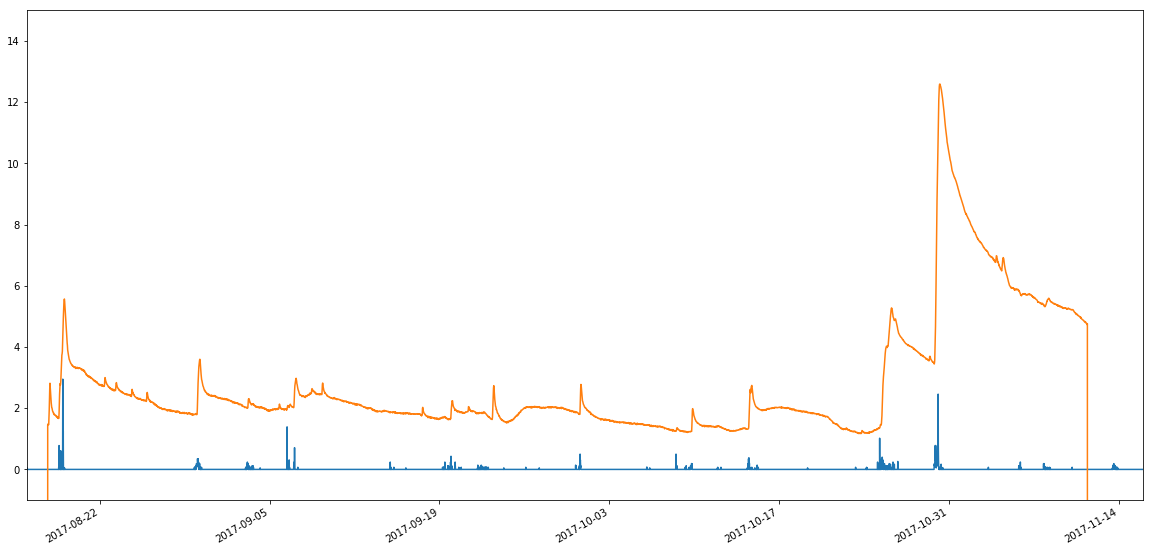

In [30]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well56['GW_elevation_ft_(LSML)'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

In [31]:
!ls -aF

./			     PSet_7.ipynb
../			     SHarris_PSet_7.html
CO-OPS__8452660__hr (1).csv  Tidal_data_8452660.csv
CO-OPS__8452660__hr.csv      Tidal_data_8452660_remaining.csv.csv
.git/			     Well33.ipynb
.ipynb_checkpoints/	     Well56.ipynb
KRIPORTS37_weather.csv	     well master.ipynb


**Lets try and see if tidal patterns have any effect on our transducer data**

In [32]:
%pwd

'/home/zonas/Documents/Projects/foglandpoint/PSet_7'

### fetching data from NOAA/CO-OPS via the [Data API](https://tidesandcurrents.noaa.gov/api/) 
specifically I am getting data from station [8452660](https://tidesandcurrents.noaa.gov/waterlevels.html?id=8452660&units=standard&bdate=20170501&edate=20171120&timezone=LST/LDT&datum=STND&interval=h&action=data)  
Note that we dont have the *Verified* (`tydl_wl_data`) data for November...seems like the data is updated monthly? we will have to use the predicted values from `tydl_pred_data`

In [33]:
tidal_water_levels = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=hourly_height&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&format=csv'
tidal_predictions = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&interval=h&format=csv'

In [34]:
tydl_wl_data = pd.read_csv(tidal_water_levels, delimiter=',')
tydl_pred_data = pd.read_csv(tidal_predictions, delimiter=',')

In [35]:
print(tydl_wl_data.columns)
print(tydl_pred_data.columns)

Index(['Date Time', ' Water Level', ' Sigma', ' I', ' L '], dtype='object')
Index(['Date Time', ' Prediction'], dtype='object')


In [36]:
tydl_wl_data['Datetime'] = pd.to_datetime(tydl_wl_data['Date Time'])
tydl_wl_data = tydl_wl_data.set_index('Datetime')
tydl_wl_data.rename(columns={' Water Level': 'Water Level'}, inplace=True)
tydl_wl_data = tydl_wl_data.drop(('Date Time'), 1)

tydl_pred_data['Datetime'] = pd.to_datetime(tydl_pred_data['Date Time'])
tydl_pred_data = tydl_pred_data.set_index('Datetime')
tydl_pred_data.rename(columns={' Prediction': 'Prediction'}, inplace=True)
tydl_pred_data = tydl_pred_data.drop(('Date Time'), 1)

#write a for-loop for the above?

(736557.0, 736649.0)

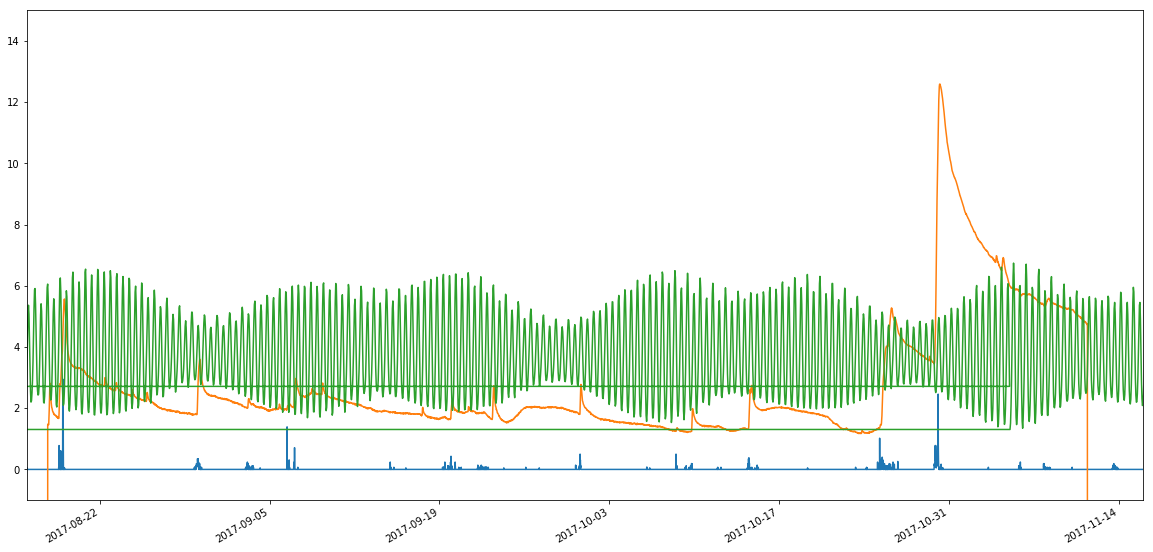

In [37]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well56['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_pred_data['Prediction'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

(736557.0, 736649.0)

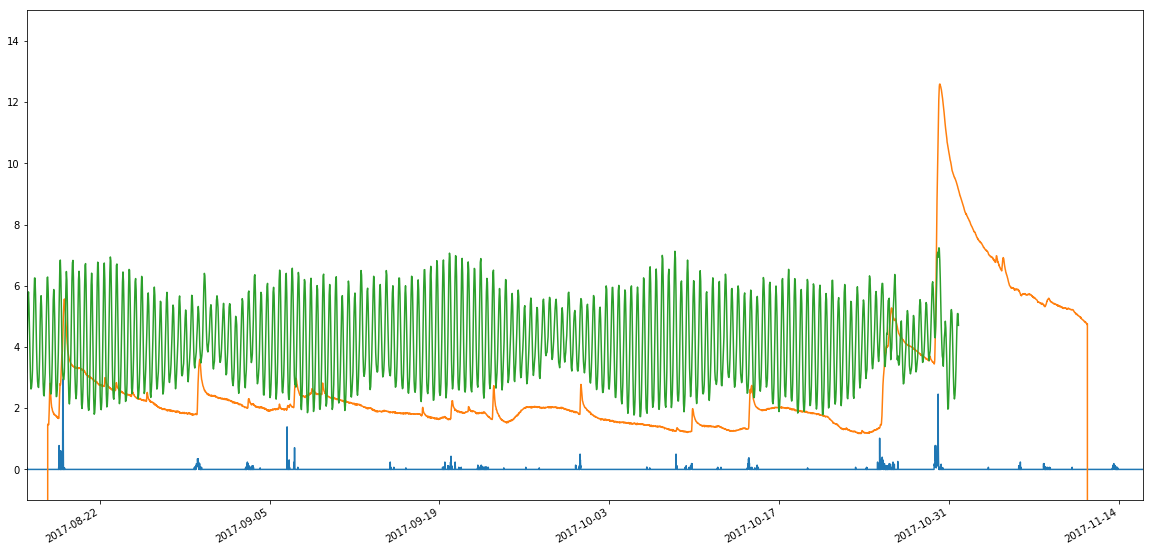

In [38]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well56['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_wl_data['Water Level'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])